In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Fetch a Dataset with Bigquery

In [2]:
from google.cloud import bigquery

# Create a Client Object
client = bigquery.Client()

# Construct a reference to the "hacker_news" dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# API request to fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "hacker_news" dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# API request to fetch the dataset
dataset = client.get_dataset(dataset_ref)

# List all the tables in the "hacker_news" dataset
tables = list(client.list_tables(dataset))

# Print names of all the tables in the dataset
for table in tables:
    print(table.table_id)

Using Kaggle's public dataset BigQuery integration.
comments
full
full_201510
stories


## Fetch a Table

In [3]:
# Construct a reference to the full table.
table_ref = dataset_ref.table("full")

# API request - fetch the table
table = client.get_table(table_ref)

table.schema

[SchemaField('title', 'STRING', 'NULLABLE', 'Story title', (), None),
 SchemaField('url', 'STRING', 'NULLABLE', 'Story url', (), None),
 SchemaField('text', 'STRING', 'NULLABLE', 'Story or comment text', (), None),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', 'Is dead?', (), None),
 SchemaField('by', 'STRING', 'NULLABLE', "The username of the item's author.", (), None),
 SchemaField('score', 'INTEGER', 'NULLABLE', 'Story score', (), None),
 SchemaField('time', 'INTEGER', 'NULLABLE', 'Unix time', (), None),
 SchemaField('timestamp', 'TIMESTAMP', 'NULLABLE', 'Timestamp for the unix time', (), None),
 SchemaField('type', 'STRING', 'NULLABLE', 'Type of details (comment, comment_ranking, poll, story, job, pollopt)', (), None),
 SchemaField('id', 'INTEGER', 'NULLABLE', "The item's unique id.", (), None),
 SchemaField('parent', 'INTEGER', 'NULLABLE', 'Parent comment ID', (), None),
 SchemaField('descendants', 'INTEGER', 'NULLABLE', 'Number of story or poll descendants', (), None),
 SchemaField

In [4]:
client.list_rows(table, max_results=5).to_dataframe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  """Entry point for launching an IPython kernel.


,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,"Berlin is in the rare position of being large,...",None,tormeh,NaN,1474809561,2016-09-25 13:19:21+00:00,comment,12575187,12574924,NaN,NaN,None
1,None,None,It is even easier to just do your work on a VM...,None,aurelianito,NaN,1474809453,2016-09-25 13:17:33+00:00,comment,12575180,12574128,NaN,NaN,None
2,None,None,If you&#x27;re using key based auth exclusivel...,None,sneak,NaN,1474809457,2016-09-25 13:17:37+00:00,comment,12575181,12574918,NaN,NaN,None
3,None,None,"Agree, with one minor quibble: In what sense &...",None,HSO,NaN,1474809479,2016-09-25 13:17:59+00:00,comment,12575183,12574900,NaN,NaN,None
4,None,None,&gt; <i>Virginia has no prior programming expe...,None,vanderZwan,NaN,1517663416,2018-02-03 13:10:16+00:00,comment,16297469,16292727,NaN,NaN,None


In [5]:
client.list_rows(table, selected_fields=table.schema[2:3], max_results=5).to_dataframe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  """Entry point for launching an IPython kernel.


,text
0,"Berlin is in the rare position of being large,..."
1,It is even easier to just do your work on a VM...
2,If you&#x27;re using key based auth exclusivel...
3,"Agree, with one minor quibble: In what sense &..."
4,&gt; <i>Virginia has no prior programming expe...


## Practice

In [6]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "chicago_crime" dataset
dataset_ref = client.dataset('chicago_crime', project='bigquery-public-data')

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


In [7]:
tables = list(client.list_tables(dataset))

for table in tables:
    print(table.table_id)

crime


In [8]:
table_ref = dataset_ref.table('crime')

# API request to fetch the table
table = client.get_table(table_ref)

table.schema

[SchemaField('unique_key', 'INTEGER', 'REQUIRED', None, (), None),
 SchemaField('case_number', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('date', 'TIMESTAMP', 'NULLABLE', None, (), None),
 SchemaField('block', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('iucr', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('primary_type', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('description', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('location_description', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('arrest', 'BOOLEAN', 'NULLABLE', None, (), None),
 SchemaField('domestic', 'BOOLEAN', 'NULLABLE', None, (), None),
 SchemaField('beat', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('district', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('ward', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('community_area', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('fbi_code', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('x_coord

In [9]:
client.list_rows(table, max_results=5).to_dataframe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  """Entry point for launching an IPython kernel.


,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,9349982,HW493726,2013-10-12 12:00:00+00:00,054XX S WELLS ST,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,RESIDENCE,False,False,...,3,37,14,1175528.0,1868979.0,2013,2018-02-10 03:50:01+00:00,41.795851,-87.631861,"(41.795850904, -87.631860571)"
1,9364557,HW507397,2013-10-25 08:00:00+00:00,051XX N TROY ST,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,OTHER,False,False,...,33,13,14,1154441.0,1934162.0,2013,2018-02-10 03:50:01+00:00,41.975166,-87.707445,"(41.975165704, -87.707444713)"
2,9524897,HX179751,2014-03-10 08:10:00+00:00,055XX S PULASKI RD,0520,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,PARKING LOT/GARAGE(NON.RESID.),False,False,...,13,62,04A,1150642.0,1867741.0,2014,2016-02-04 06:33:39+00:00,41.792975,-87.723152,"(41.792974653, -87.723151723)"
3,9533969,HX187952,2014-03-16 10:30:00+00:00,049XX S KOMENSKY AVE,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,RESIDENCE,False,False,...,14,57,14,1150199.0,1871544.0,2014,2016-02-04 06:33:39+00:00,41.803419,-87.724677,"(41.803419272, -87.724677432)"
4,9542021,HX195519,2014-03-23 06:40:00+00:00,047XX S RIDGEWAY AVE,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,VEHICLE NON-COMMERCIAL,False,False,...,14,57,26,1152162.0,1873010.0,2014,2018-02-10 03:50:01+00:00,41.807404,-87.717440,"(41.807403814, -87.717439552)"


## Air Quality Records

In [10]:
from google.cloud import bigquery
client = bigquery.Client()

dataset_ref = client.dataset("openaq", project="bigquery-public-data")
dataset = client.get_dataset(dataset_ref)

table_ref = list(client.list_tables(dataset))

for table in tables:
    print(table.table_id)

Using Kaggle's public dataset BigQuery integration.
crime


In [11]:
table_ref = dataset_ref.table('global_air_quality')

table = client.get_table(table_ref)
table.schema

[SchemaField('location', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('city', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('country', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('pollutant', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('value', 'FLOAT', 'NULLABLE', None, (), None),
 SchemaField('timestamp', 'TIMESTAMP', 'NULLABLE', None, (), None),
 SchemaField('unit', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('source_name', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('latitude', 'FLOAT', 'NULLABLE', None, (), None),
 SchemaField('longitude', 'FLOAT', 'NULLABLE', None, (), None),
 SchemaField('averaged_over_in_hours', 'FLOAT', 'NULLABLE', None, (), None),
 SchemaField('location_geom', 'GEOGRAPHY', 'NULLABLE', None, (), None)]

In [12]:
client.list_rows(table, max_results=5).to_dataframe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  """Entry point for launching an IPython kernel.


,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
0,MA,Salt Lake City,US,o3,0.039,2020-01-06 18:00:00+00:00,ppm,AirNow,40.712063,-112.111120,1.0,POINT(-112.11112 40.712063)
1,MA,Salt Lake City,US,no2,0.003,2020-01-06 18:00:00+00:00,ppm,AirNow,40.712063,-112.111120,1.0,POINT(-112.11112 40.712063)
2,MA,Salt Lake City,US,pm25,1.300,2020-01-06 18:00:00+00:00,µg/m³,AirNow,40.712063,-112.111120,1.0,POINT(-112.11112 40.712063)
3,MA,Salt Lake City,US,so2,0.001,2020-01-06 18:00:00+00:00,ppm,AirNow,40.712063,-112.111120,1.0,POINT(-112.11112 40.712063)
4,NR,Salt Lake City,US,co,0.000,2020-06-11 00:00:00+00:00,ppm,AirNow,40.662840,-111.901794,1.0,POINT(-111.901794 40.66284)


In [13]:
first_query = """
        SELECT *
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

safe_config = bigquery.QueryJobConfig(maximum_bytes=10**10)
first_query_job = client.query(first_query, job_config=safe_config)

first_results = first_query_job.to_dataframe()

first_results.head()

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
0,MA,Salt Lake City,US,o3,0.039,2020-01-06 18:00:00+00:00,ppm,AirNow,40.712063,-112.111120,1.0,POINT(-112.11112 40.712063)
1,MA,Salt Lake City,US,no2,0.003,2020-01-06 18:00:00+00:00,ppm,AirNow,40.712063,-112.111120,1.0,POINT(-112.11112 40.712063)
2,MA,Salt Lake City,US,pm25,1.300,2020-01-06 18:00:00+00:00,µg/m³,AirNow,40.712063,-112.111120,1.0,POINT(-112.11112 40.712063)
3,MA,Salt Lake City,US,so2,0.001,2020-01-06 18:00:00+00:00,ppm,AirNow,40.712063,-112.111120,1.0,POINT(-112.11112 40.712063)
4,NR,Salt Lake City,US,co,0.000,2020-06-11 00:00:00+00:00,ppm,AirNow,40.662840,-111.901794,1.0,POINT(-111.901794 40.66284)


In [14]:
zero_pollution_query = """
                       SELECT *
                       FROM `bigquery-public-data.openaq.global_air_quality`
                       WHERE value = 0
                       """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
second_query_job = client.query(zero_pollution_query, job_config=safe_config)

second_results = second_query_job.to_dataframe()

second_results.head()

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
0,NR,Salt Lake City,US,co,0.0,2020-06-11 00:00:00+00:00,ppm,AirNow,40.662840,-111.901794,1.0,POINT(-111.901794 40.66284)
1,MLK,Philadelphia-Camden-Wilmington,US,so2,0.0,2020-06-10 23:00:00+00:00,ppm,AirNow,39.739400,-75.558100,1.0,POINT(-75.5581 39.7394)
2,Elko,ELKO,US,pm10,0.0,2020-06-11 00:00:00+00:00,µg/m³,AirNow,40.838330,-115.766010,1.0,POINT(-115.76601 40.83833)
3,Hope,Columbus,US,so2,0.0,2017-01-03 11:00:00+00:00,ppm,AirNow,39.294323,-85.766846,1.0,POINT(-85.766846 39.294323)
4,Kona,Hilo,US,pm25,0.0,2020-06-11 00:00:00+00:00,µg/m³,AirNow,19.509700,-155.913300,1.0,POINT(-155.9133 19.5097)


GROUP BY, HAVING

In [15]:
from google.cloud import bigquery
client = bigquery.Client()

dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")
dataset = client.get_dataset(dataset_ref)

tables = list(client.list_tables(dataset))


for table in tables:
    print(table.table_id)

Using Kaggle's public dataset BigQuery integration.
comments
full
full_201510
stories


In [16]:
table_ref = dataset_ref.table("comments")
table = client.get_table(table_ref)

client.list_rows(table, max_results=5).to_dataframe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  after removing the cwd from sys.path.


,id,by,author,time,time_ts,text,parent,deleted,dead,ranking
0,2701393,5l,5l,1309184881,2011-06-27 14:28:01+00:00,And the glazier who fixed all the broken windo...,2701243,None,None,0
1,5811403,99,99,1370234048,2013-06-03 04:34:08+00:00,Does canada have the equivalent of H1B/Green c...,5804452,None,None,0
2,21623,AF,AF,1178992400,2007-05-12 17:53:20+00:00,"Speaking of Rails, there are other options in ...",21611,None,None,0
3,10159727,EA,EA,1441206574,2015-09-02 15:09:34+00:00,Humans and large livestock (and maybe even pet...,10159396,None,None,0
4,2988424,Iv,Iv,1315853580,2011-09-12 18:53:00+00:00,I must say I reacted in the same way when I re...,2988179,None,None,0


In [17]:
query_popular = """
                SELECT parent, COUNT(id)
                FROM `bigquery-public-data.hacker_news.comments`
                GROUP BY parent
                HAVING COUNT(id) > 10
                """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_popular, job_config=safe_config)

popular_comments = query_job.to_dataframe()
popular_comments.head()

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


,parent,f0_
0,7536283,45
1,4053076,242
2,2530963,59
3,1934367,70
4,8204007,43


In [18]:
prolific_commenters_query = """
                            SELECT author, COUNT(id) AS NumPosts
                            FROM `bigquery-public-data.hacker_news.comments`
                            GROUP BY author
                            HAVING COUNT(id) > 10000
                            """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
prolific_query = client.query(prolific_commenters_query, job_config=safe_config)

prolific_commentors = prolific_query.to_dataframe()

prolific_commentors.head()

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


,author,NumPosts
0,dragonwriter,10723
1,None,227736
2,eru,10448
3,rbanffy,10557
4,DanBC,12902


In [19]:
from google.cloud import bigquery

client = bigquery.Client()
dataset_ref = client.dataset('nhtsa_traffic_fatalities', project='bigquery-public-data')
dataset = client.get_dataset(dataset_ref)

tables = list(client.list_tables(dataset))

for table in tables:
    print(table.table_id)

Using Kaggle's public dataset BigQuery integration.
accident_2015
accident_2016
cevent_2015
cevent_2016
damage_2015
damage_2016
distract_2015
distract_2016
drimpair_2015
drimpair_2016
factor_2015
factor_2016
maneuver_2015
maneuver_2016
nmcrash_2015
nmcrash_2016
nmimpair_2015
nmimpair_2016
nmprior_2015
nmprior_2016
parkwork_2015
parkwork_2016
pbtype_2015
pbtype_2016
person_2015
person_2016
safetyeq_2015
safetyeq_2016
vehicle_2015
vehicle_2016
vevent_2015
vevent_2016
vindecode_2015
vindecode_2016
violatn_2015
violatn_2016
vision_2015
vision_2016
vsoe_2015
vsoe_2016


In [20]:
table_ref = dataset_ref.table("accident_2015")
table = client.get_table(table_ref)

client.list_rows(table, max_results=5).to_dataframe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  after removing the cwd from sys.path.


,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,19,Iowa,190204,1,1,0,0,0,1,1,...,2,0,None,0,None,0,None,1,1,2015-09-11 20:20:00+00:00
1,19,Iowa,190233,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,1,2015-11-01 00:30:00+00:00
2,19,Iowa,190179,1,1,0,0,0,2,2,...,1,0,None,0,None,0,None,1,0,2015-05-04 16:18:00+00:00
3,19,Iowa,190248,1,1,0,0,0,4,4,...,99,0,None,0,None,0,None,2,0,2015-11-17 12:26:00+00:00
4,19,Iowa,190231,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,0,2015-10-31 04:49:00+00:00


In [21]:
query = """
        SELECT COUNT(consecutive_number) AS num_accidents, 
            EXTRACT(DAYOFWEEK FROM timestamp_of_crash) AS day_of_week
        FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
        GROUP BY day_of_week
        ORDER BY num_accidents DESC
        """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**9)
query_job = client.query(query, job_config=safe_config)

accidents_by_day = query_job.to_dataframe()
accidents_by_day

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


,num_accidents,day_of_week
0,5659,7
1,5298,1
2,4916,6
3,4460,5
4,4182,4
5,4038,2
6,3985,3


In [22]:
from google.cloud import bigquery
client = bigquery.Client()

dataset_ref = client.dataset('world_bank_intl_education', project='bigquery-public-data')
dataset = client.get_dataset(dataset_ref)

tables = list(client.list_tables(dataset))

for table in tables:
    print(table.table_id)

Using Kaggle's public dataset BigQuery integration.
country_series_definitions
country_summary
international_education
series_summary


In [23]:
table_ref = dataset_ref.table('international_education')
table = client.get_table(table_ref)

client.list_rows(table, max_results=5).to_dataframe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  after removing the cwd from sys.path.


,country_name,country_code,indicator_name,indicator_code,value,year
0,Canada,CAN,"Population, ages 0-14, total",SP.POP.0014.TO,5.795256e+06,2016
1,Central African Republic,CAF,Official entrance age to lower secondary educa...,SE.SEC.AGES,1.200000e+01,2016
2,Central African Republic,CAF,Theoretical duration of upper secondary educat...,SE.SEC.DURS.UP,3.000000e+00,2016
3,Chad,TCD,"Illiterate population, 25-64 years, male (number)",UIS.ILLPOP.AG25T64.M,1.530592e+06,2016
4,China,CHN,"Population, female",SP.POP.TOTL.FE.IN,6.682916e+08,2016


In [24]:
from google.cloud import bigquery
client = bigquery.Client()

dataset_ref = client.dataset('crypto_bitcoin', project='bigquery-public-data')
dataset = client.get_dataset(dataset_ref)

tables = list(client.list_tables(dataset))

for table in tables:
    print(table.table_id)

Using Kaggle's public dataset BigQuery integration.
blocks
inputs
outputs
transactions


In [25]:
table_ref = dataset_ref.table('transactions')
table = client.get_table(table_ref)

client.list_rows(table, max_results=5).to_dataframe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  after removing the cwd from sys.path.


,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,275,275,1,0,00000000dc55860c8a29c58d45209318fa9e9dc2c1833a...,181,2009-01-12 06:02:13+00:00,2009-01-01,1,2,4000000000.000000000,4000000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'f4184...","[{'index': 0, 'script_asm': '04b5abd412d4341b4..."
1,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,275,275,1,0,0000000054487811fc4ff7a95be738aa5ad9320c394c48...,182,2009-01-12 06:12:16+00:00,2009-01-01,1,2,3000000000.000000000,3000000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'a16f3...","[{'index': 0, 'script_asm': '0401518fa1d1e1e3e..."
2,12b5633bad1f9c167d523ad1aa1947b2732a865bf5414e...,276,276,1,0,00000000f46e513f038baf6f2d9a95b2a28d8a6c985bcf...,183,2009-01-12 06:34:22+00:00,2009-01-01,1,2,2900000000.000000000,2900000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': '591e9...","[{'index': 0, 'script_asm': '04baa9d3665315562..."
3,828ef3b079f9c23829c56fe86e85b4a69d9e06e5b54ea5...,276,276,1,0,00000000fb5b44edc7a1aa105075564a179d65506e2bd2...,248,2009-01-12 20:04:20+00:00,2009-01-01,1,2,2800000000.000000000,2800000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': '12b56...","[{'index': 0, 'script_asm': '04bed827d37474bef..."
4,35288d269cee1941eaebb2ea85e32b42cdb2b04284a56d...,277,277,1,0,00000000689051c09ff2cd091cc4c22c10b965eb8db3ad...,545,2009-01-15 05:48:32+00:00,2009-01-01,1,2,2500000000.000000000,2500000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'd71fd...","[{'index': 0, 'script_asm': '044a656f065871a35..."


In [26]:
query = """
        WITH time AS
        (
            SELECT DATE(block_timestamp) AS trans_date
            FROM `bigquery-public-data.crypto_bitcoin.transactions`
        )
        SELECT COUNT(1) AS transactions,
            trans_date
        FROM time
        GROUP BY trans_date
        ORDER BY trans_date
        
        """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query, job_config=safe_config)

transactions_by_date = query_job.to_dataframe()

transactions_by_date.head()

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


,transactions,trans_date
0,1,2009-01-03
1,14,2009-01-09
2,61,2009-01-10
3,93,2009-01-11
4,101,2009-01-12


<AxesSubplot:xlabel='trans_date'>

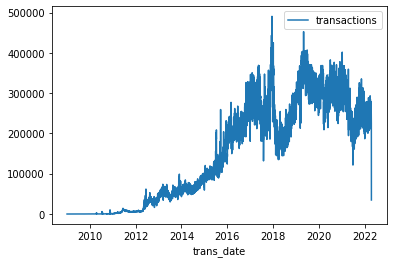

In [27]:
transactions_by_date.set_index('trans_date').plot()